In [58]:
# !pip install mllibs
# !pip install geopandas
# !pip install geoplot
# !pip install mapclassify
# !pip install folium
# !pip install numpy==1.24.4
# !pip install tornado==6.1.0
# !pip install --upgrade xarray pandas 
# !pip install --upgrade numba
# !pip install --upgrade --force-reinstall scikit-learn

PROBLEM STATEMENT

There are a large number of factors that can affect the value of a house property (eg. location, size, condition, time), these factors can change quite substantially from one property to another
The housing market itself is quite a volatile industry, and is quite dependent on demand and supply fluctuations, not to even mention economic factors sch as interest rates & inflation, so its quite a challenge to predict the price variation over time
It's also quite challenging to predict housing prices due to the limited data that is available, most datasets contain a limited number of features related to each property, such is why feature engineering is quite important
As a result, it is generally quite difficult to accurately predict property prices that take into account all the factors that influence it
The California housing dataaset contains different house related attributes for properties located in California
STUDY AIM

The aim is to model is to predict the median_house_value which is our target variable
Overcome missing data with a basic unsupervised learning data imputation
Identification of outliers in a dataset
Understand how to turn a simple model into your own sklearn comparible class, our aim won't be to create the most perfect model
NOTEBOOK COVERS

Introduction to basic ML principles such as missing data, scaling, feature engineering, outliers,
A basic introduction to sklearn compatible classes,model exploration & model modification in an attempt to improve our model
MODEL SELECTION

We'll use an existing model; Bayesian Linear Regression in class structure that can be used with sklearn's Pipeline and cross validation options, so we can use it here.

In [59]:
import os, sys, warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

import numpy as np
from numpy.linalg import pinv, inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

# Data Preparation

Loading the dataset ¶
df.info(),describe(),head() are probably one of the first things we might want to inspect having a pandas dataframe; showing feature names, limits/stats and and a few first columns respectively, to get a some initial impression of the data


In [60]:
# load the dataset
df = pd.read_csv('./data/housing.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
df.shape

(20640, 10)

In [64]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


 Data imputation
 
We can note that we have a number of features with some missing data, but not too many instances overall (257/20640);
Lets try an Unsupervised Learning (UL) approach based on the kNN model, we can use the function below and pass a dataframe to generated an imputed dataframe
kNN Unsupervised Learning Imputation¶
Function to impuse missing data using an unsupervised model.

Thorough of the entire dataset & not having the availability of new data is undesirable.
We want to reserve some data, & use it to see how good the model is at prediction on unseen data, so lets create it using train_test_split
trdata : Training Data Subset (Let's inspect the data as if we only had this data this)
tedata : Test Data Subset (Use this subset for model evaluation)

In [66]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 207


# EXPLORATORY DATA ANALYSIS

We want to know a little more about our data, a simple data exploration approach is conducted here

3.1 | Univariate histograms
Lets look at our data distribution, using univariate analysis (analysis of 1 variable). What we might look for in histograms:

Data distribution ( certain models prefer less skewed distributions )
Outliers ( Low Noise Assumption can be detremental to model performance )
Odd patterns in data ( Data abnormalities also affect model performance )
Axis Scale ( Feature scale values can affect a models performance )

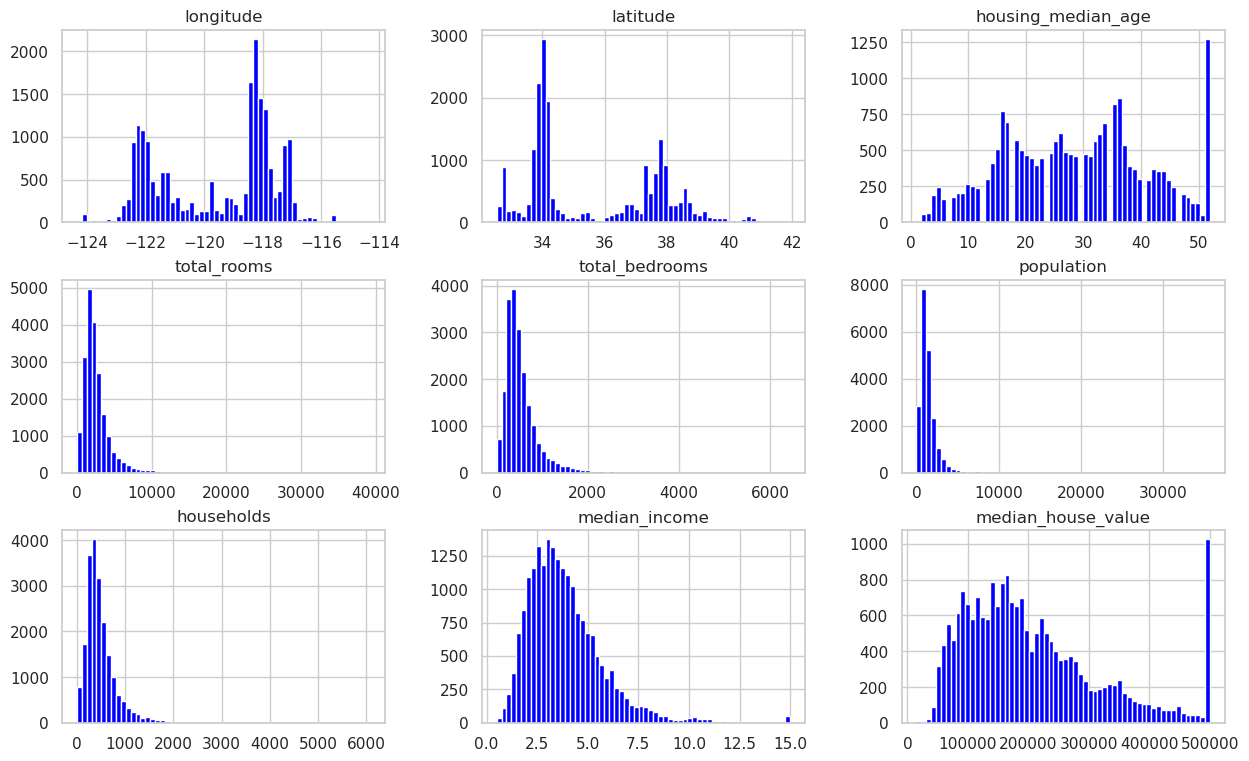

In [67]:
df.hist(bins=60, figsize=(15,9),color='blue');plt.show()

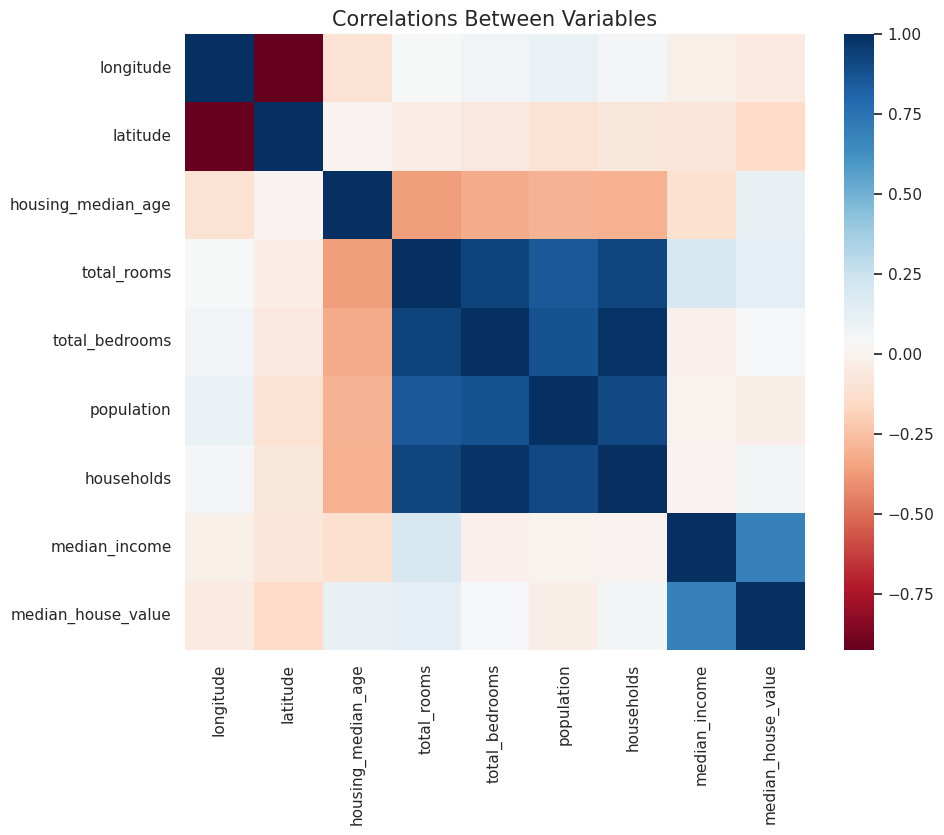

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Odd Patterns & Outliers
Data distributions which slightly sticks out:

On first impression, a few outlier (inconsistent with entire set) groups are present in our data; possibly due to the way in which the data was sampled ( 'housing_median_age' & 'median_house_value' )
House_median_age is one possible feature with such outliers. Also having a lot of local peaks (all are quite gradual) but one really odd peak at the maximum value stands out. It has some slight discontinuity in data (which becomes visible with the adjustment of bins)
Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.

Bivariate (Two Feature) Two-Feature relation ; correlation meature
Very fast way to understand something about the dataset.
Correlation matrix contains only information about the linear similarity of two feature relations

In [69]:
important_num_cols = list(df.corr()["median_house_value"][(df.corr()["median_house_value"]>0.50) | (df.corr()["median_house_value"]<-0.50)].index)
cat_cols = ["longitude", "latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [70]:
df

,median_income,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,8.3252,452600.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,8.3014,358500.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,7.2574,352100.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,5.6431,341300.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,3.8462,342200.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,78100.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,2.5568,77100.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,1.7000,92300.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,1.8672,84700.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20433 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


## Feature Selection

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.

In [72]:
df.shape

(20640, 10)

Series([], dtype: object)


<Figure size 1000x800 with 0 Axes>

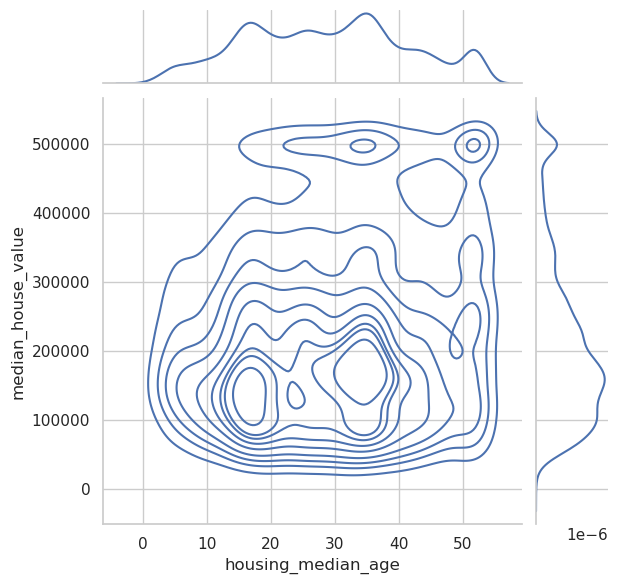

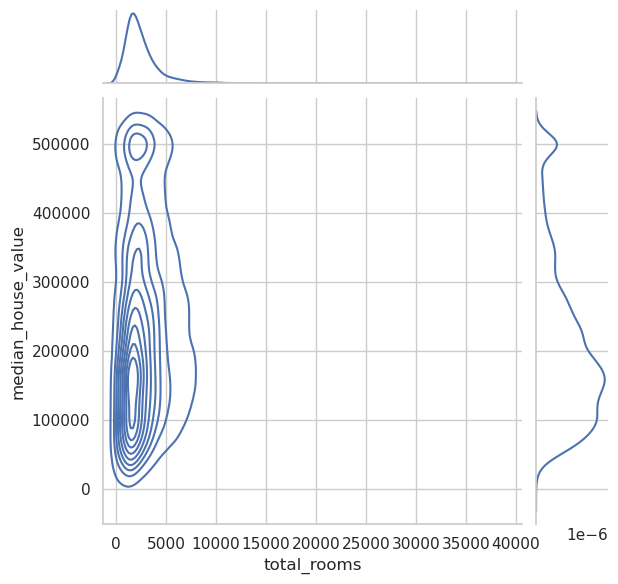

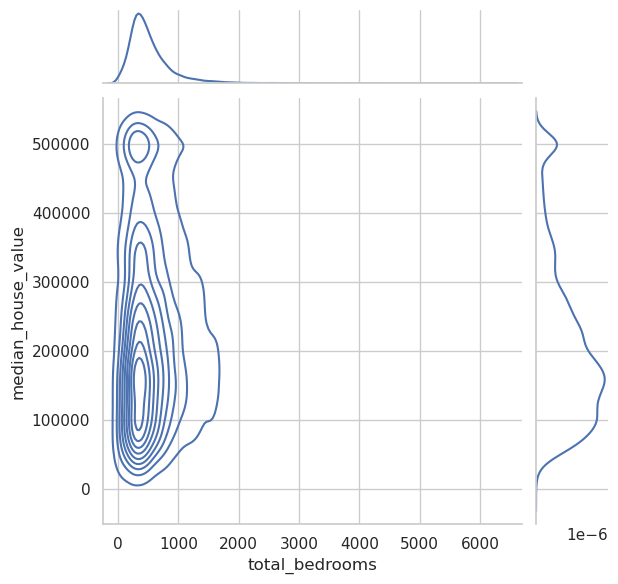

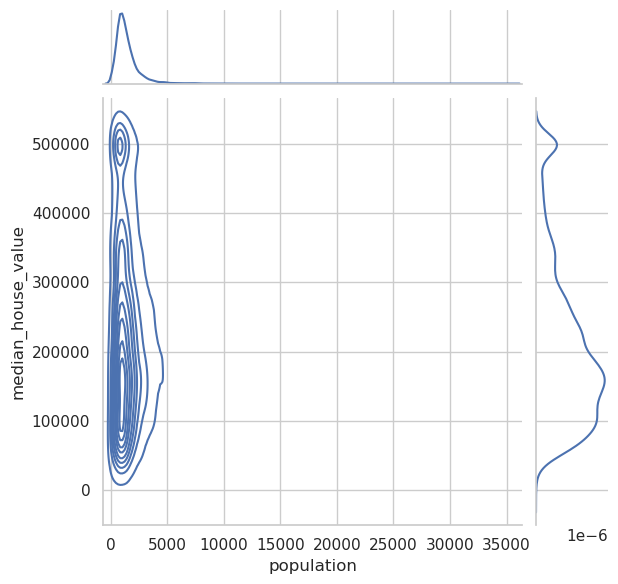

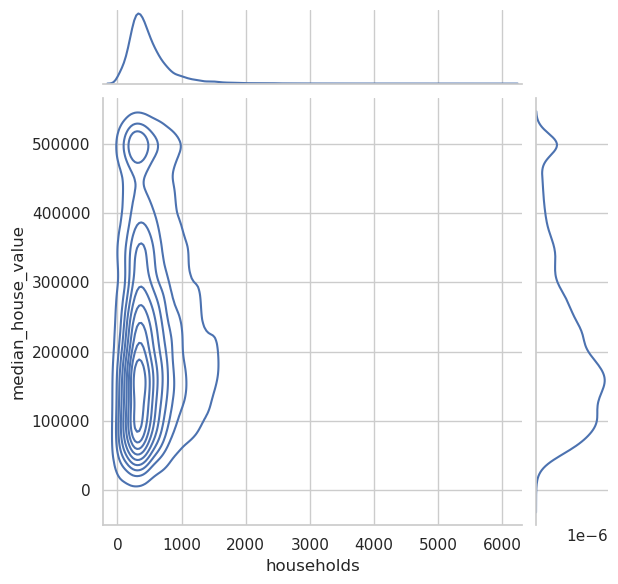

In [73]:
# Check for non-numeric columns
print(df.dtypes[df.dtypes != 'float64'])

# If "longitude" and "latitude" are not relevant, remove them
new_df = df.drop(columns=['longitude', 'latitude'])

# If "total_bedrooms" has missing values, try converting (be cautious!)
new_df['total_bedrooms'] = pd.to_numeric(new_df['total_bedrooms'], errors='coerce')  # This might introduce NaNs

# Remove duplicate "median_income" column (assuming it's the second one)
new_df = new_df.drop(columns=['median_income'])

# Create pair plot
plt.figure(figsize=(10, 8))
sns.jointplot(x=new_df["housing_median_age"], y=new_df["median_house_value"], kind="kde")
sns.jointplot(x=new_df["total_rooms"], y=new_df["median_house_value"], kind="kde")
sns.jointplot(x=new_df["total_bedrooms"], y=new_df["median_house_value"], kind="kde")
sns.jointplot(x=new_df["population"], y=new_df["median_house_value"], kind="kde")
sns.jointplot(x=new_df["households"], y=new_df["median_house_value"], kind="kde")
plt.show()


## X, y Split

Splitting the data into X and y chunks

In [74]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# One-Hot Encoding

One-hot encoding is a technique used to convert categorical data into a numerical format that can be used by machine learning algorithms.


In [75]:
X = pd.get_dummies(X, columns=cat_cols)

## Standardizing the Data

Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:

z = (x - mean) / sd


## Train Test split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [82]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])